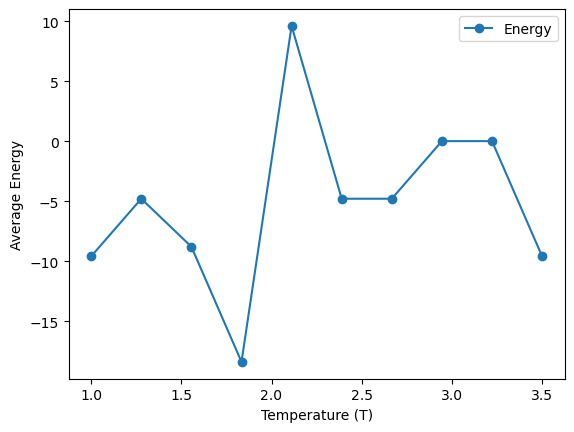

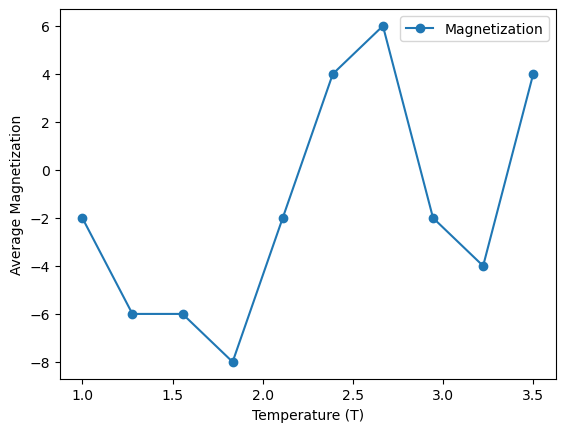

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(N):
    """Initialize the lattice with random spins."""
    return np.random.choice([-1, 1], size=(N, N))

def calculate_energy(lattice, J1, J2, J3):
    """Calculate the total energy of the lattice considering first, second, and third neighbors."""
    N = lattice.shape[0]
    energy = 0
    for i in range(N):
        for j in range(N):
            S = lattice[i, j]
            # First neighbors
            neighbors1 = lattice[(i+1)%N, j] + lattice[i, (j+1)%N] + lattice[(i-1)%N, j] + lattice[i, (j-1)%N]
            # Second neighbors
            neighbors2 = lattice[(i+2)%N, j] + lattice[i, (j+2)%N] + lattice[(i-2)%N, j] + lattice[i, (j-2)%N]
            # Third neighbors
            neighbors3 = lattice[(i+3)%N, j] + lattice[i, (j+3)%N] + lattice[(i-3)%N, j] + lattice[i, (j-3)%N]
            energy += -J1 * S*  neighbors1 - J2*  S  *neighbors2 - J3*  S  *neighbors3
    return energy / 2  # Each pair counted twice

def calculate_magnetization(lattice):
    """Calculate the total magnetization of the lattice."""
    return np.sum(lattice)

def monte_carlo_step(lattice, beta, J1, J2, J3):
    """Perform one Monte Carlo step using the Metropolis algorithm."""
    N = lattice.shape[0]
    for _ in range(N):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        S = lattice[i, j]
        dE = 2 * (J1 * S * (lattice[(i+1)%N, j] + lattice[(i-1)%N, j] + lattice[i, (j+1)%N] + lattice[i, (j-1)%N]) +
                             J2*  S * (lattice[(i+2)%N, j] + lattice[(i-2)%N, j] + lattice[i, (j+2)%N] + lattice[i, (j-2)%N]) +
                             J3  *S * (lattice[(i+3)%N, j] + lattice[(i-3)%N, j] + lattice[i, (j+3)%N] + lattice[i, (j-3)%N]))
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            lattice[i, j] = -S
    return lattice

def simulate_ensemble(N, T, J1, J2, J3, steps):
    """Simulate the Ising model and return the average magnetization and energy."""
    beta = 1.0 / T
    lattice = initialize_lattice(N)
    energies = []
    magnetizations = []
    
    for step in range(steps):
        lattice = monte_carlo_step(lattice, beta, J1, J2, J3)
        if step % 100 == 0:
            energy = calculate_energy(lattice, J1, J2, J3)
            magnetization = calculate_magnetization(lattice)
            energies.append(energy)
            magnetizations.append(magnetization)
    
    avg_energy = np.mean(energies)
    avg_magnetization = np.mean(magnetizations)
    return avg_energy, avg_magnetization

def main_ensemble():
    N = 4  # Lattice size
    J1 = 1.0  # Interaction strength for first neighbors
    J2 = 0.5  # Interaction strength for second neighbors
    J3 = 0.2  # Interaction strength for third neighbors
    steps = 100  # Number of Monte Carlo steps
    temperatures = np.linspace(1.0, 3.5, 10)  # Temperature range
    
    avg_energies = []
    avg_magnetizations = []
    
    for T in temperatures:
        avg_energy, avg_magnetization = simulate_ensemble(N, T, J1, J2, J3, steps)
        avg_energies.append(avg_energy)
        avg_magnetizations.append(avg_magnetization)
    
    plt.figure()
    plt.plot(temperatures, avg_energies, 'o-', label='Energy')
    plt.xlabel('Temperature (T)')
    plt.ylabel('Average Energy')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(temperatures, avg_magnetizations, 'o-', label='Magnetization')
    plt.xlabel('Temperature (T)')
    plt.ylabel('Average Magnetization')
    plt.legend()
    plt.show()

main_ensemble()